<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/sonar_pos2vel_kf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy import io

np.random.seed(0)

In [0]:
input_mat = io.loadmat('/content/gdrive/My Drive/data/kalmanfilter/source/9.DvKalman/SonarAlt.mat')

In [0]:
def get_sonar(i):
    """Measure sonar."""
    z = input_mat['sonarAlt'][0][i] # input_mat['sonaralt']: (1,1501)
    return z

In [0]:
def kalman_filter(z_meas,x_esti,P):
    """Kalman Filter Algorithm"""
    # (1) Prediction.
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T +Q

    # (2) Kalman Gain.
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)

    # (3) Estimation
    x_esti = x_pred + K @ (z_meas - H @ x_pred)

    # (4) Error Covariance.
    P = P_pred - K @ H @ P_pred

    return x_esti, P

In [0]:
# Input parameters.
n_samples = 500
time_end = 10

In [0]:
# Initialization for system model.
# Define matrix with rank 2 for matrix operation.
dt = time_end / n_samples
A = np.array([[1,dt],
              [0,1]])
H = np.array([[1,0]])
Q = np.array([[1,0],
              [0,3]])
R = np.array([[10]])

# Initialization for estimation.
x_0 = np.array([0,20]) # position and velocity
P_0 = 5 * np.eye(2)

In [0]:
time = np.arange(0,time_end,dt)
z_pos_meas_save = np.zeros(n_samples)
x_pos_esti_save = np.zeros(n_samples)
x_vel_esti_save = np.zeros(n_samples)

In [0]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_sonar(i)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas,x_esti,P)
    
    z_pos_meas_save[i] = z_meas
    x_pos_esti_save[i] = x_esti[0]
    x_vel_esti_save[i] = x_esti[1]

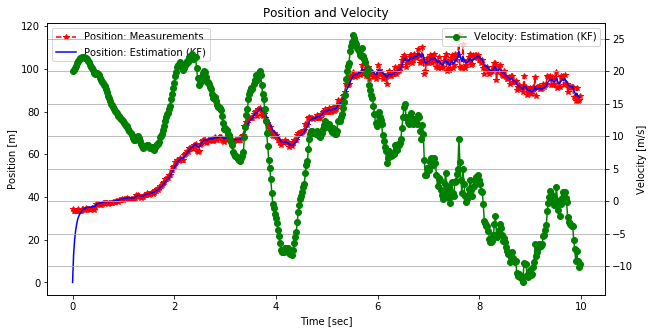

In [11]:
ig, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(time, z_pos_meas_save, 'r*--', label='Position: Measurements')
plt.plot(time, x_pos_esti_save, 'b-', label='Position: Estimation (KF)')
plt.legend(loc='upper left')
plt.title('Position and Velocity')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')

ax2 = ax1.twinx()
plt.plot(time, x_vel_esti_save, 'go-', label='Velocity: Estimation (KF)')
plt.legend(loc='upper right')
plt.ylabel('Velocity [m/s]')
plt.grid(True)